# Convolutional Neural Network

**Description:**
- Trains different variations of a CNN  on the CIFAR-10 Dataset which classifies animals and vehicles.
- Compares the results to determine the optimal CNN.
- Enables users to upload their own images to test with the CNN.

**Dataset:**
- Found here: https://www.cs.toronto.edu/~kriz/cifar.html
- 60,000 32x32 images
- 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

**Data:**

| Model | Layers | Training Accuracy | Testing Accuracy |
|---    |---     |---                | ---              |
| 1 |  3 layers of size 32, 64, 128 with 50% dropout | 0.78 | 0.73 |
| 2 |  3 layers of size 32, 64, 128 | 0.89 | 0.71 |
| 3 |  3 layers of size 32, 64, 64 | 0.79 | 0.70 |
| 4 | 3 layers of size 32, 64, 64 with 1 less pooling | 0.92 | 0.68 |
| 5 | 2 layers of size 32, 64  | 0.90 | 0.66 |

**Conclusions:**
- Greater than 10 epochs does not substantially improve test accuracy
- Dropout of 50% improves generalization; test set performs slightly better even though training accuracy is lower
- 3 layers and all pooling layers generalizes better
- a larger 3rd layer improves accuracy slightly





## Train

In [1]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
# Load numpy arrays
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

img_width = 32
img_height = 32
img_color_channels = 3
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
               'horse', 'ship', 'truck']

# Normalize RGB
train_images = train_images / 255.0
test_images = test_images / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [3]:
model_list = []

### Model 1
3 layers of size 32, 64, 128 with 50% dropout

In [4]:
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, img_color_channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10)
])

model1.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model1.fit(train_images, train_labels, epochs=10)
model_list.append(model1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 55ms/step - accuracy: 0.3209 - loss: 1.8212
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 51ms/step - accuracy: 0.5462 - loss: 1.2738
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 54ms/step - accuracy: 0.6168 - loss: 1.0978
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.6611 - loss: 0.9749
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.6895 - loss: 0.9019
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.7117 - loss: 0.8272
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.7320 - loss: 0.7735
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.7462 - loss: 0.7164
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.7593 - loss: 0.6846
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 52ms/step - accuracy: 0.7757 - loss: 0.6389


### Model 2
3 layers of size 32, 64, 128

In [5]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, img_color_channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10)
])

model2.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
model_list.append(model2)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3750 - loss: 1.6897 - val_accuracy: 0.5809 - val_loss: 1.1706
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6158 - loss: 1.0858 - val_accuracy: 0.6626 - val_loss: 0.9663
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6871 - loss: 0.8899 - val_accuracy: 0.6842 - val_loss: 0.9312
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7346 - loss: 0.7563 - val_accuracy: 0.6823 - val_loss: 0.9341
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7684 - loss: 0.6713 - val_accuracy: 0.6871 - val_loss: 0.9034
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7978 - loss: 0.5819 - val_accuracy: 0.7234 - val_loss: 0.8397
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8203 - loss: 0.5091 - val_accuracy: 0.7258 - val_loss: 0.8645
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8433 - loss: 0.4401 -

### Model 3
3 layers of size 32, 64, 64

In [6]:
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, img_color_channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

model3.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model3.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
model_list.append(model3)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3414 - loss: 1.7784 - val_accuracy: 0.5206 - val_loss: 1.3050
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5657 - loss: 1.2223 - val_accuracy: 0.5993 - val_loss: 1.1566
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6293 - loss: 1.0518 - val_accuracy: 0.6215 - val_loss: 1.0677
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6683 - loss: 0.9387 - val_accuracy: 0.6688 - val_loss: 0.9521
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7064 - loss: 0.8433 - val_accuracy: 0.6839 - val_loss: 0.8999
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7285 - loss: 0.7836 - val_accuracy: 0.6983 - val_loss: 0.8818
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7482 - loss: 0.7266 - val_accuracy: 0.7031 - val_loss: 0.8510
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7634 - loss: 0.6784 - 

### Model 4
3 layers of size 32, 32, 64 with 1 less pooling layer

In [7]:
model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, img_color_channels)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

model4.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model4.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
model_list.append(model4)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3955 - loss: 1.6506 - val_accuracy: 0.6185 - val_loss: 1.0801
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6417 - loss: 1.0204 - val_accuracy: 0.6674 - val_loss: 0.9489
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7160 - loss: 0.8197 - val_accuracy: 0.6931 - val_loss: 0.8685
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7598 - loss: 0.6938 - val_accuracy: 0.6918 - val_loss: 0.9249
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7885 - loss: 0.5969 - val_accuracy: 0.7095 - val_loss: 0.8587
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8202 - loss: 0.5132 - val_accuracy: 0.7072 - val_loss: 0.8909
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8483 - loss: 0.4284 - val_accuracy: 0.7106 - val_loss: 0.9392
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8783 - loss: 0.3520 

### Model 5
2 layers of size 32, 64

In [9]:
model6 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, img_color_channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

model6.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model6.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
model_list.append(model6)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4016 - loss: 1.6496 - val_accuracy: 0.5950 - val_loss: 1.1496
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6282 - loss: 1.0675 - val_accuracy: 0.6535 - val_loss: 1.0004
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6876 - loss: 0.9016 - val_accuracy: 0.6693 - val_loss: 0.9664
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7302 - loss: 0.7782 - val_accuracy: 0.6712 - val_loss: 0.9784
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7531 - loss: 0.6998 - val_accuracy: 0.6621 - val_loss: 1.0118
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7922 - loss: 0.6007 - val_accuracy: 0.6746 - val_loss: 1.0106
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8201 - loss: 0.5129 - val_accuracy: 0.6772 - val_loss: 1.0527
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8511 - loss: 0.4270 - 

## Test & Compare

In [10]:
from sklearn.metrics import f1_score

for i in range(len(model_list)):
  print(f"Model {i+1}:")
  model_list[i].evaluate(test_images, test_labels)

Model 1:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7349 - loss: 0.8042
Model 2:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7146 - loss: 1.0270
Model 3:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6996 - loss: 0.9054
Model 4:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6811 - loss: 1.2806
Model 5:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6314 - loss: 1.0750
Model 6:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6612 - loss: 1.3511


### Save Model

In [5]:
best_model = model1
best_model.save("CIFAR_CNN.keras")

## Try Your Own Images

In [6]:
def preprocess(img_path):
  """ Returns normalized and reshaped image array. """

  img = image.load_img(img_path, target_size=(32, 32))
  img_arr = image.img_to_array(img)
  img_arr /= 255.0  # Normalize RGB
  img_arr_exp = np.expand_dims(img_arr, axis=0)  # 4D shape for prediction
  return img_arr, img_arr_exp

def predict(img_path, model, plot=True):
  """ Predict class of image using model. Output is the image and a bar
  plot of the prediction values of the image. If plot is false, output
  is printed instead of plotted."""

  img_arr, img_arr_exp = preprocess(img_path)
  predictions = model.predict(img_arr_exp)
  final_prediction = np.argmax(predictions, axis=1)[0]

  if plot:
    plt.subplot(1, 2, 1)
    plt.imshow(img_arr)
    plt.title(f"Prediction: {class_names[final_prediction]}")

    plt.subplot(1, 2, 2)
    colors = cm.plasma(predictions[0] / np.max(predictions[0]))
    plt.bar(class_names, predictions[0], color=colors)
    plt.title("Prediction Values")
    plt.xticks(rotation=90)

    plt.show()
  else:
    print(f"Predicted class: {class_names[final_prediction]}")
    print("Prediction Values:")
    for i in range(len(predictions[0])):
      print(f"\t{class_names[i]}: \t{predictions[0][i]}")


### Predict Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


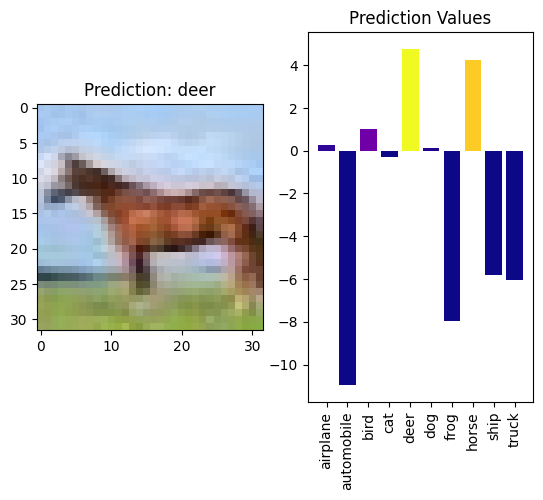

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


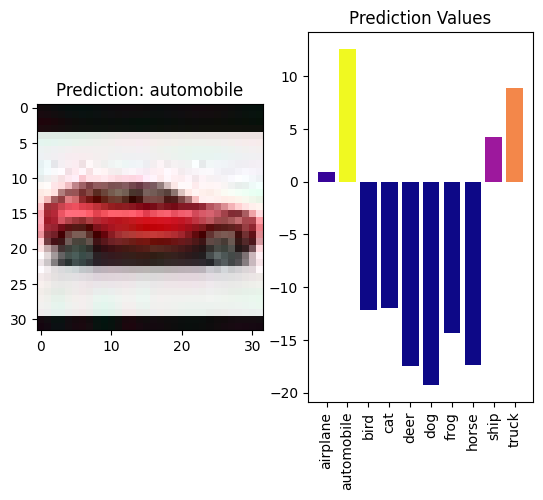

In [7]:
myModel = load_model("CIFAR_CNN.keras")

# Example below: horse is incorrectly predicted but is very close, and car is correct
predict(img_path="horse32.jpg", model=myModel, plot=True)
predict(img_path="car32.jpg", model=myModel, plot=True)

# for i in range(len(model_list)):
#   print(f"Model {i+1}:")
#   predict(img_path="horse32.jpg", model=model_list[i], plot=True)
#   predict(img_path="car32.jpg", model=model_list[i], plot=False)
